In [3]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Changing directory to my drive
ROOT = "/content/drive/MyDrive/Deep Learning/MNIST"
os.chdir(ROOT)

In [5]:
os.getcwd()

'/content/drive/MyDrive/Deep Learning/MNIST'

In [6]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
len(X_test[1][0])

28

In [10]:
  # create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [11]:
len(X_train_full[5000:] )

55000

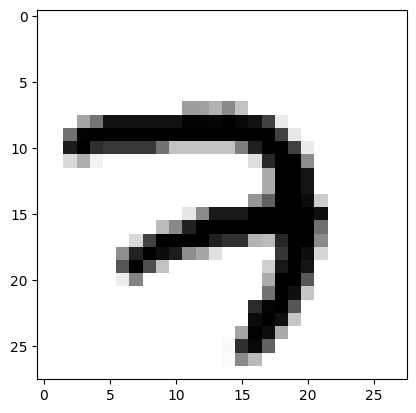

In [12]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

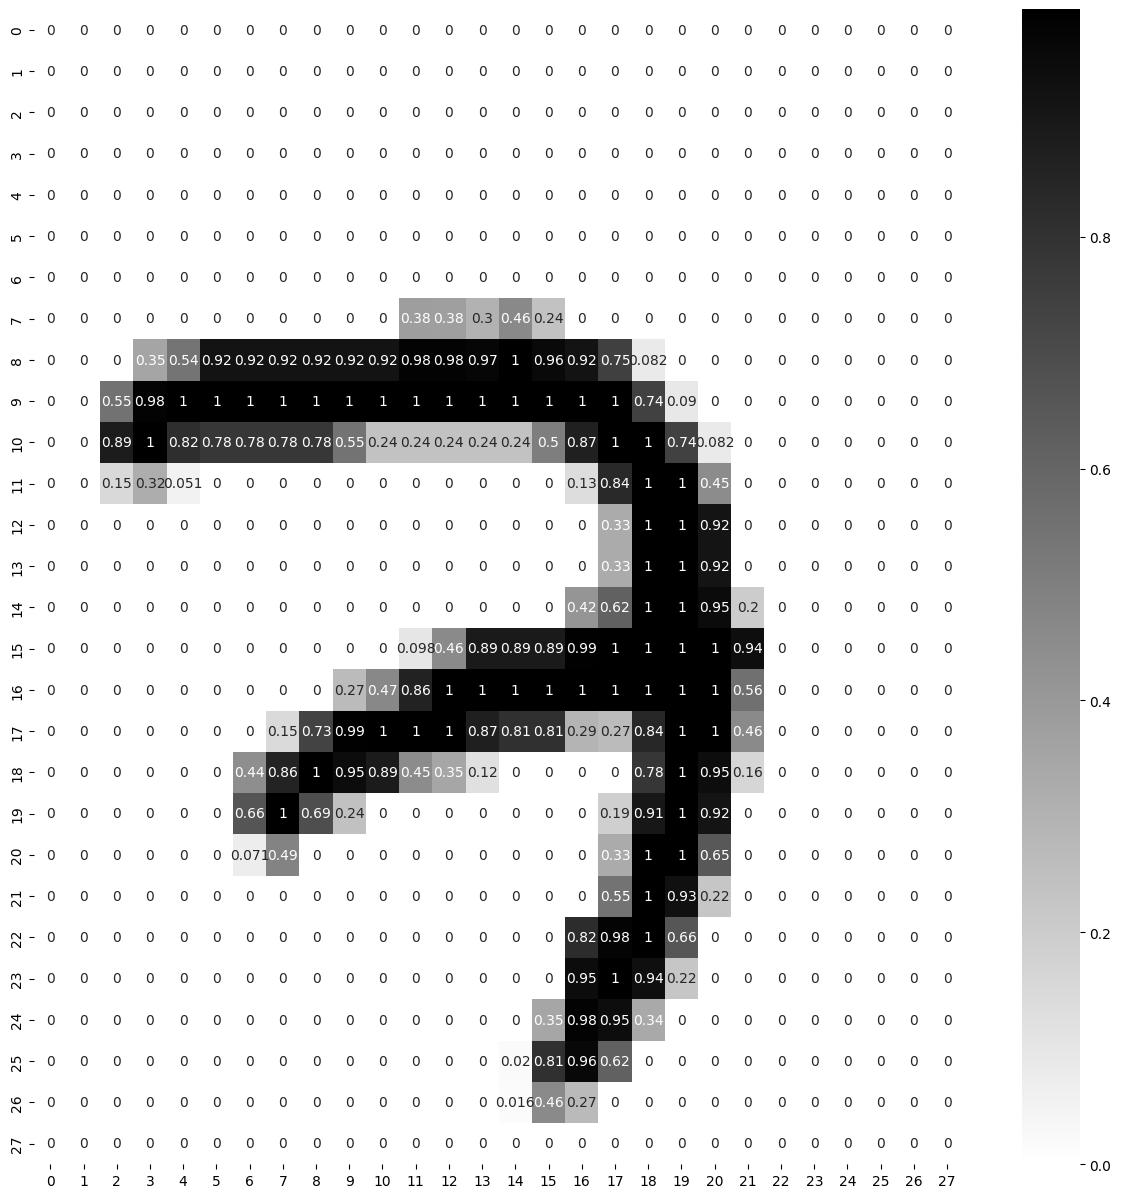

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

<Axes: >

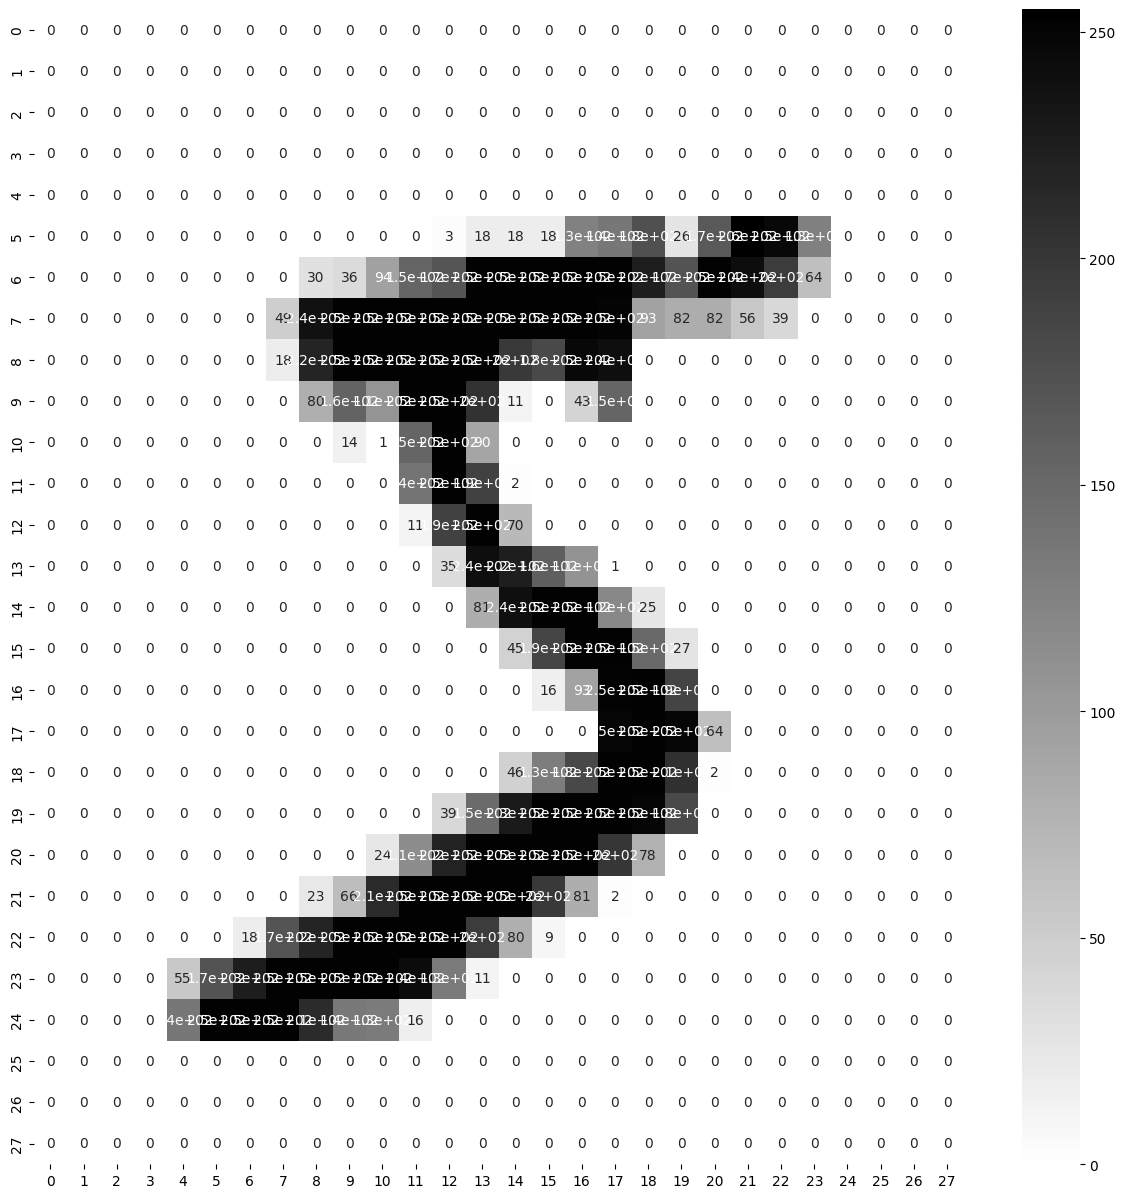

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0], annot=True, cmap="binary")

In [15]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [16]:
model_clf.layers

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [19]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [20]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [21]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [22]:
len(hidden1.get_weights()[1])

300

In [23]:
hidden1.get_weights()

[array([[-0.02753711, -0.07019557, -0.02170599, ..., -0.03763742,
         -0.03497183,  0.03474322],
        [ 0.05215549,  0.02696413, -0.06966902, ...,  0.06114343,
         -0.0059557 , -0.02051346],
        [-0.02719969,  0.0394906 ,  0.05533592, ..., -0.04357902,
         -0.0540822 , -0.02033757],
        ...,
        [-0.05856465,  0.01665311,  0.05303223, ..., -0.06373527,
         -0.03444189,  0.01968861],
        [-0.03556571, -0.02305467,  0.03956334, ..., -0.00307807,
          0.04091436,  0.02947105],
        [-0.03562557,  0.04123957, -0.06965064, ...,  0.02734029,
          0.03081732,  0.04149645]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.02753711, -0.07019557, -0.02170599, ..., -0.03763742,
        -0.03497183,  0.03474322],
       [ 0.05215549,  0.02696413, -0.06966902, ...,  0.06114343,
        -0.0059557 , -0.02051346],
       [-0.02719969,  0.0394906 ,  0.05533592, ..., -0.04357902,
        -0.0540822 , -0.02033757],
       ...,
       [-0.05856465,  0.01665311,  0.05303223, ..., -0.06373527,
        -0.03444189,  0.01968861],
       [-0.03556571, -0.02305467,  0.03956334, ..., -0.00307807,
         0.04091436,  0.02947105],
       [-0.03562557,  0.04123957, -0.06965064, ...,  0.02734029,
         0.03081732,  0.04149645]], dtype=float32)

In [26]:
print("shape\n", biases.shape)

shape
 (300,)


In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [28]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_11_22_17_23_12


In [29]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [30]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [31]:
# Orginal train

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 12s 4ms/step - loss: 0.5856 - accuracy: 0.8509 - val_loss: 0.3032 - val_accuracy: 0.9162
Epoch 2/10
  24/1719 [..............................] - ETA: 7s - loss: 0.3247 - accuracy: 0.9154

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 6s 4ms/step - loss: 0.2857 - accuracy: 0.9181 - val_loss: 0.2363 - val_accuracy: 0.9342
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2320 - accuracy: 0.9338 - val_loss: 0.1976 - val_accuracy: 0.9458
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1970 - accuracy: 0.9432 - val_loss: 0.1757 - val_accuracy: 0.9544
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1718 - accuracy: 0.9502 - val_loss: 0.1528 - val_accuracy: 0.9588
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1519 - accuracy: 0.9568 - val_loss: 0.1422 - val_accuracy: 0.9594
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1363 - accuracy: 0.9607 - val_loss: 0.1269 - val_accuracy: 0.9670
Epoch 8/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1234 - accuracy: 0.9646 - val_loss: 0.1170 - val_accuracy: 0.9710
Epo

In [32]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0946 - accuracy: 0.9728 - val_loss: 0.0969 - val_accuracy: 0.9754
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9757 - val_loss: 0.0949 - val_accuracy: 0.9744
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0810 - accuracy: 0.9772 - val_loss: 0.0890 - val_accuracy: 0.9760
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0753 - accuracy: 0.9785 - val_loss: 0.0898 - val_accuracy: 0.9752
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0702 - accuracy: 0.9807 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9816 - val_loss: 0.0824 - val_accuracy: 0.9768
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9830 - val_loss: 0.0795 - val_accuracy:

In [33]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [34]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2023_11_22_17_26_02_.h5 will be saved at TRAINED_MODEL/Model_2023_11_22_17_26_02_.h5


'TRAINED_MODEL/Model_2023_11_22_17_26_02_.h5'

In [35]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

<ipython-input-35-87cef6f4b7ac>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [36]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [37]:
# history.history

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.094623,0.972818,0.096932,0.9754
1,0.087213,0.975709,0.094892,0.9744
2,0.080955,0.977182,0.089018,0.9760
3,0.075339,0.978473,0.089791,0.9752
4,0.070200,0.980691,0.085173,0.9758
5,0.065580,0.981600,0.082413,0.9768
6,0.061292,0.983036,0.079530,0.9776
7,0.057570,0.984182,0.074938,0.9784
8,0.053747,0.985055,0.076109,0.9762
9,0.050578,0.986091,0.075027,0.9784


<Axes: >

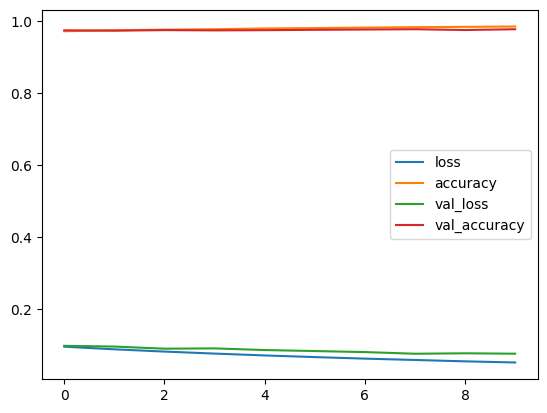

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9657


[0.11501631885766983, 0.9656999707221985]

In [41]:
x_new = X_test[:3]
# x_new

In [42]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [43]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 79ms/step


array([[0.   , 0.   , 0.001, 0.005, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.   ],
       [0.   , 0.   , 0.992, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.991, 0.001, 0.001, 0.   , 0.   , 0.001, 0.004, 0.001,
        0.   ]], dtype=float32)

In [44]:
y_pred = np.argmax(y_prob, axis = -1)

In [45]:
y_pred

array([7, 2, 1])

In [46]:
actual

array([7, 2, 1], dtype=uint8)

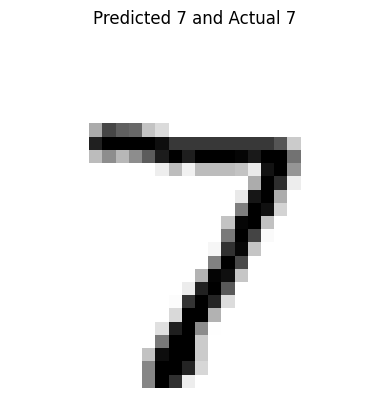

######################


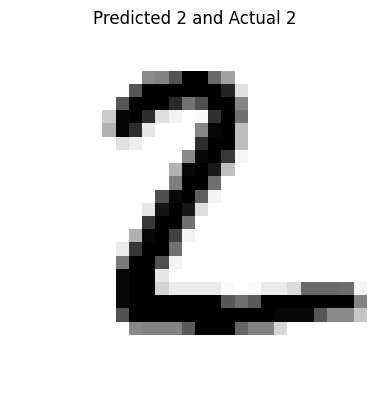

######################


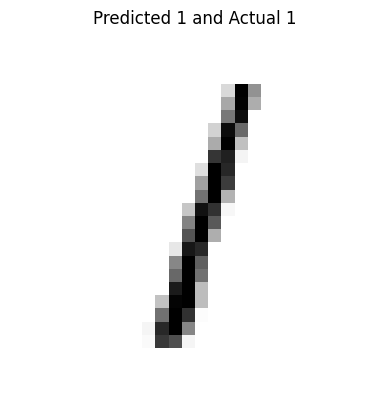

######################


In [47]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

In [48]:
os.listdir("TRAINED_MODEL")

['Model_2023_11_22_17_26_02_.h5']

In [49]:
path_name_model = "TRAINED_MODEL/Model_2023_07_28_13_55_18_.h5"
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(X_test, y_test)

OSError: ignored

In [ ]:
predict= loaded_model.predict(x_new)
classes=np.argmax(predict,axis=1)

In [ ]:
classes

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit